In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name= fm.FontProperties(fname='C:\\Windows\\Fonts\\malgun.ttf').get_name()
plt.rc('font',family=font_name)

import matplotlib as mlp
mlp.rcParams['axes.unicode_minus']=False

In [2]:
import mglearn
from sklearn.neighbors import KNeighborsClassifier
# ?KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score # 정확도

from sklearn.linear_model import LinearRegression

from sklearn.datasets import load_iris

# 1. 종류

[평가지표](https://netsong7.tistory.com/entry/%EC%86%90%EC%8B%A4%ED%95%A8%EC%88%98%EC%99%80-%EB%AF%B8%EB%B6%84-%EA%B3%B5%EC%8B%9D)
- 일반 선형회귀 모델: 과적합 발생 가능. 튜닝 불가
- 릿지 선형회귀 모델: L2 규제(MSE항(일반선형회귀모델)에 Penalty항 추가)
- 라쏘 선형회귀 모델
- 엘라스틱넷 선형회귀 모델

In [4]:
from sklearn.datasets import load_boston
boston= load_boston()
boston.data

C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [5]:
X_train, X_test, y_train, y_test= train_test_split(boston.data, boston.target, random_state=0)

In [9]:
model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
print('훈련 점수:', model.score(X_train, y_train))
print('테스트 점수:', model.score(X_test, y_test))
# 훈련 결과만 좋음 -> 과적합

훈련 점수: 0.7697699488741149
테스트 점수: 0.6354638433202129


# 2. 고차원 특성에 대한 과적합
[과적합](https://netsong7.tistory.com/entry/II-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%9D%98-%EB%B6%84%EB%A5%98%EC%99%80-%EA%B3%BC%EC%A0%81%ED%95%A9)

In [6]:
from mglearn.datasets import load_extended_boston

In [7]:
X, y= load_extended_boston() # 변수 갯수 뻥튀기
print(X.shape)

(506, 104)


In [20]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=0)

In [21]:
model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
print('훈련 점수:', model.score(X_train, y_train)) # 변수가 늘어나면 설명력 올라감
print('테스트 점수:', model.score(X_test, y_test)) # 과적합 문제



훈련 점수: 0.9520519609032729
테스트 점수: 0.6074721959665845


## (1) Ridge Linear Regression

과적합을 줄이기 위해 사용. 성능과 별개

- L2 규제(Regularization)
    - MSE(MeanSquareError)항에 Penalty항을 추가
- 학습률(알파, learning rate)을 크게하면 페널티의 효과가 커지고(가중치 감소, 모델 단순), 작게하면 반대가 된다.
- 모델을 단순하게 해주고 성능 차이를 절충. 성능 자체에는 영향 없다
- 규제를 사용하면 다중 공선성 문제를 방지하기 때문에 모델의 과대적합을 막을 수 있다.

L2: 제곱의 합
L1: 절댓값

In [23]:
from sklearn.linear_model import Ridge

In [28]:
ridge= Ridge(alpha=1.0).fit(X_train, y_train)

print('훈련 점수:', ridge.score(X_train, y_train))
print('테스트 점수:', ridge.score(X_test, y_test))

훈련 점수: 0.885796658517094
테스트 점수: 0.7527683481744754


In [29]:
ridge10= Ridge(alpha=10).fit(X_train, y_train)

print('훈련 점수:', ridge10.score(X_train, y_train))
print('테스트 점수:', ridge10.score(X_test, y_test))

훈련 점수: 0.7882787115369615
테스트 점수: 0.6359411489177311


In [30]:
ridge01= Ridge(alpha=0.1).fit(X_train, y_train)

print('훈련 점수:', ridge01.score(X_train, y_train))
print('테스트 점수:', ridge01.score(X_test, y_test))

훈련 점수: 0.9282273685001986
테스트 점수: 0.772206793647982


(-15.0, 25.0)

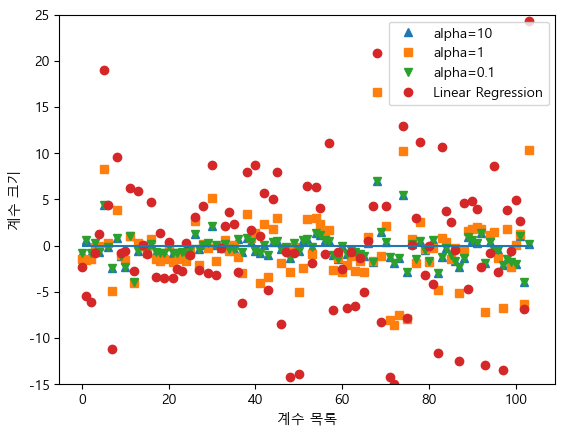

In [35]:
plt.plot(ridge10.coef_, '^', label='alpha=10')
plt.plot(ridge.coef_, 's', label='alpha=1')
plt.plot(ridge10.coef_, 'v', label='alpha=0.1')
# 알파가 클수록 모여있음

plt.plot(model.coef_, 'o', label='Linear Regression') # 일반 선형회귀모델
# 규제가 없으므로 0.1과 가장 비슷

plt.legend()
plt.xlabel('계수 목록')
plt.ylabel('계수 크기')
plt.hlines(0,0,len(model.coef_))
plt.ylim(-15,25)

## (2) Lasso Linear Regression

- L1 규제 -> 가중치 절댓값 합
- 특성 선택이 자동으로 이루어진다
- 알파를 크게 하면 페널티의 효과가 커지고(가중치 감소, 모델 단순), 작게하면 반대

변수를 없애는 효과
Ridge 사용 후 Lasso 쓰기

In [36]:
from sklearn.linear_model import Lasso

In [38]:
lasso= Lasso(alpha=1.0).fit(X_train, y_train)

print('훈련 점수:', lasso.score(X_train, y_train))
print('테스트 점수:', lasso.score(X_test, y_test))
print('사용한 특성의 수: ', np.sum(lasso.coef_ != 0)) # 알파가 0이 아닌 변수

훈련 점수: 0.29323768991114607
테스트 점수: 0.20937503255272294
사용한 특성의 수:  4


In [44]:
lasso001= Lasso(alpha=0.01).fit(X_train, y_train)

print('훈련 점수:', lasso001.score(X_train, y_train))
print('테스트 점수:', lasso001.score(X_test, y_test))
print('사용한 특성의 수: ', np.sum(lasso001.coef_ != 0)) # 알파가 0이 아닌 변수

훈련 점수: 0.8961122320864717
테스트 점수: 0.7677995670886713
사용한 특성의 수:  32


C:\Users\acorn\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.690e+01, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(


In [45]:
lasso00001= Lasso(alpha=0.0001).fit(X_train, y_train)

print('훈련 점수:', lasso00001.score(X_train, y_train))
print('테스트 점수:', lasso00001.score(X_test, y_test))
print('사용한 특성의 수: ', np.sum(lasso0001.coef_ != 0)) # 알파가 0이 아닌 변수
# 과적합 심해짐

C:\Users\acorn\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.440e+02, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(


훈련 점수: 0.9420931515237063
테스트 점수: 0.6976541391663642
사용한 특성의 수:  76


(-15.0, 25.0)

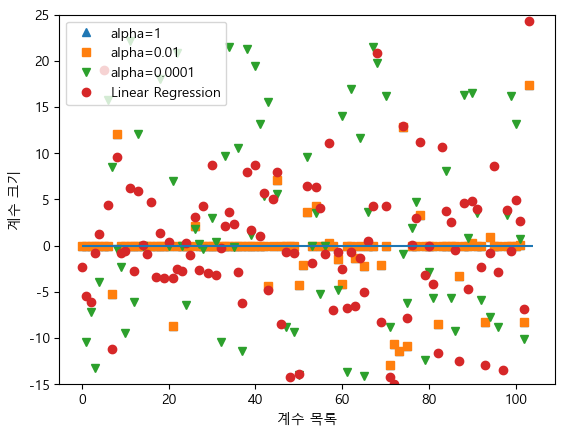

In [47]:
plt.plot(lasso.coef_, '^', label='alpha=1')
plt.plot(lasso001.coef_, 's', label='alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='alpha=0.0001')
# 알파가 클수록 모여있음

plt.plot(model.coef_, 'o', label='Linear Regression') # 일반 선형회귀모델
# 규제가 없으므로 0.1과 가장 비슷

plt.legend()
plt.xlabel('계수 목록')
plt.ylabel('계수 크기')
plt.hlines(0,0,len(model.coef_))
plt.ylim(-15,25)

## (3) ElasticNet Linear Regression(신축망)
- L2와 L1 모두 사용. 성능 가장 좋음. 속도 느림
- 릿지회귀와 라쏘회귀의 모든 규제를 사용
- 데이터 특성이 많거나 서로 상관관계가 높은 특성이 존재할 때 위의 두 모델보다 좋은 성능을 보여준다

In [48]:
from sklearn.linear_model import ElasticNet

In [49]:
elastic= ElasticNet().fit(X_train, y_train) # alpha=1.0, l1_ratio=0.5

print('훈련 점수:', elastic.score(X_train, y_train))
print('테스트 점수:', elastic.score(X_test, y_test))
print('사용한 특성의 수: ', np.sum(elastic.coef_ != 0))

훈련 점수: 0.32837814485847916
테스트 점수: 0.2217004367773664
사용한 특성의 수:  38


In [51]:
elastic001= ElasticNet(alpha=0.01).fit(X_train, y_train) # alpha=1.0, l1_ratio=0.5

print('훈련 점수:', elastic001.score(X_train, y_train))
print('테스트 점수:', elastic001.score(X_test, y_test))
print('사용한 특성의 수: ', np.sum(elastic001.coef_ != 0))

훈련 점수: 0.8553665697077995
테스트 점수: 0.7209054027265391
사용한 특성의 수:  84


In [53]:
elastic00001= ElasticNet(alpha=0.0001).fit(X_train, y_train) # alpha=1.0, l1_ratio=0.5

print('훈련 점수:', elastic00001.score(X_train, y_train))
print('테스트 점수:', elastic00001.score(X_test, y_test))
print('사용한 특성의 수: ', np.sum(elastic00001.coef_ != 0))
# 과적합 심해짐. 규제가 약해짐

훈련 점수: 0.9374103160789478
테스트 점수: 0.7318843811977773
사용한 특성의 수:  103


C:\Users\acorn\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.141e+03, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(


## (4) 알파값을 1로 고정한 상태에서 데이터의 크기 조절

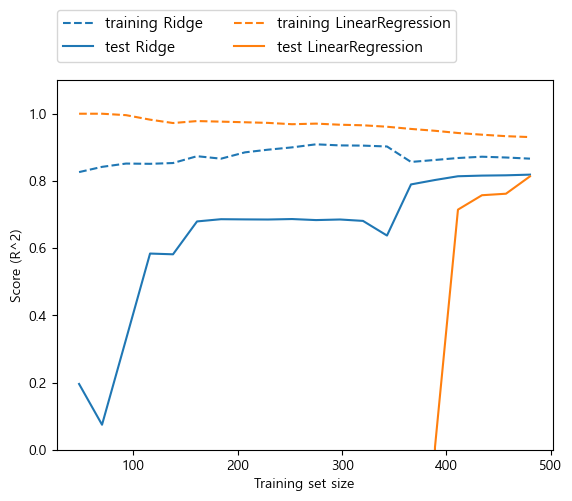

In [54]:
mglearn.plots.plot_ridge_n_samples() # y축: 성능
# linear는 데이터 수가 적으면 학습조차되지않음
# ridge는 데이터 수에 민감하지 않다.
# 결국 데이터가 많아지면 결과는 비슷해짐

# 3. 캘리포니아 주택 가격

## (1) Data Definition & EDA

In [55]:
from sklearn.datasets import fetch_california_housing

In [265]:
california= fetch_california_housing()
print(california.keys())
print(california.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
ex

In [266]:
california_df= pd.DataFrame(california.data, columns=california.feature_names)
california_df['Target']= california.target
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [267]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

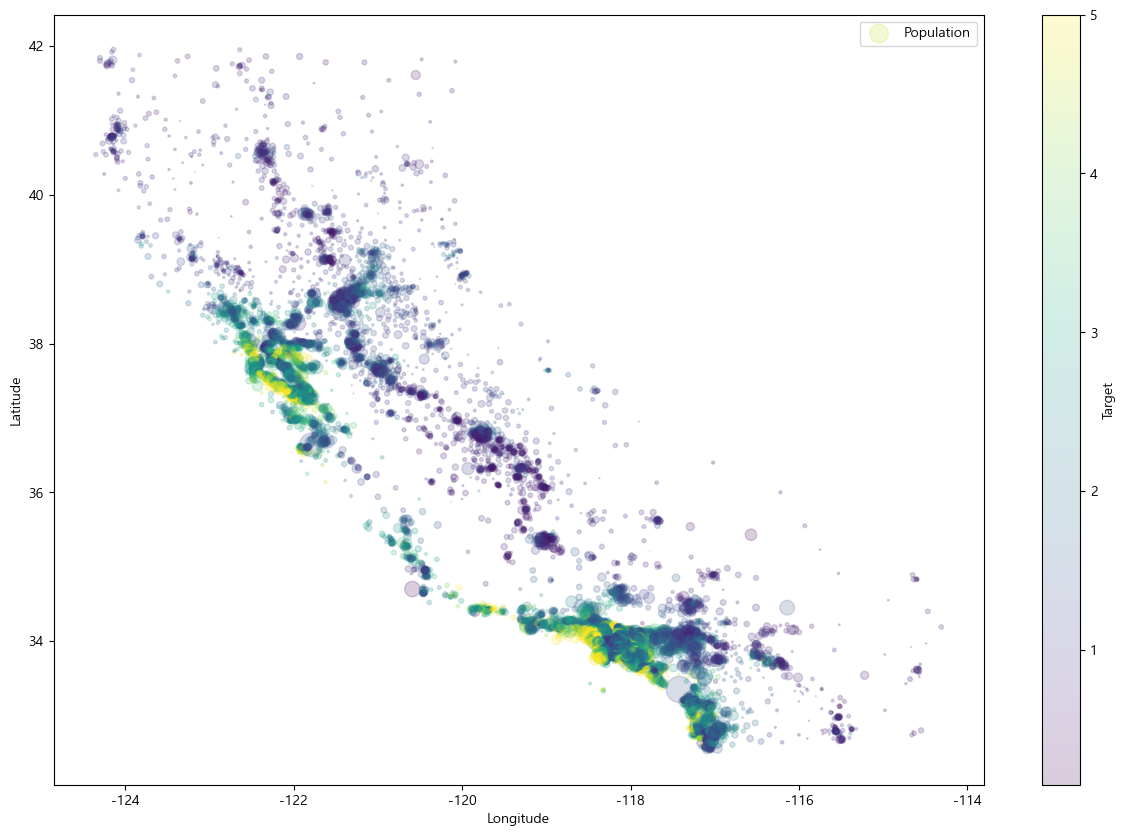

In [268]:
california_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2, c='Target', cmap=plt.get_cmap('viridis'),
                  figsize=(15,10), s= california_df['Population']/100, label='Population')

## (2) 선형회귀
scikit
- fit(), score(), predict()

In [269]:
X_train, X_test, y_train, y_test= train_test_split(california.data, california.target, random_state=42)

In [270]:
model= LinearRegression().fit(X_train, y_train) # alpha=1.0, l1_ratio=0.5

print('훈련 점수:', model.score(X_train, y_train))
print('테스트 점수:', model.score(X_test, y_test))

훈련 점수: 0.609873031052925
테스트 점수: 0.5910509795491352


In [271]:
# 데이터가 편향적인지 확인
scores= cross_val_score(model, california.data, california.target, cv=10, scoring='neg_mean_squared_error')

In [272]:
print(scores.mean()) # 큰 차이 없으므로 골고루 분포해있음

-0.5509524296956643


In [273]:
r2_scores= cross_val_score(model, california.data, california.target, cv=10, scoring='r2')

In [274]:
print(r2_scores.mean())

0.5110068610523769


In [275]:
from sklearn.metrics import mean_squared_error, r2_score

In [276]:
y_train_predict= model.predict(X_train)

rmse= np.sqrt(mean_squared_error(y_train, y_train_predict))
r2= r2_score(y_train, y_train_predict)

print('RMSE:', rmse)
print('R2:', r2)
# 회귀는 평가지표에따라 결과 다름
# 분류는 정확도만 보면됨

RMSE: 0.7214930466501482
R2: 0.609873031052925


In [277]:
print(y_train_predict[:10])
print(y_train[:10])

[2.35870897 3.14117532 2.2227708  3.17998867 0.85244297 2.10097132
 2.32663483 0.61851715 4.1970875  1.30793711]
[2.285   2.799   1.83    4.658   1.5     2.509   5.00001 1.208   5.00001
 0.993  ]


In [278]:
y_test_predict= model.predict(X_test)

rmse= np.sqrt(mean_squared_error(y_test, y_test_predict))
r2= r2_score(y_test, y_test_predict)

print('RMSE:', rmse)
print('R2:', r2)

RMSE: 0.7356145375446768
R2: 0.5910509795491352


## (3) 통계적 분석

In [279]:
import statsmodels.formula.api as sm

In [280]:
result= sm.ols(formula='Target ~ MedInc +  HouseAge  + AveRooms  + AveBedrms +  Population +  AveOccup + Latitude +  Longitude', 
      data= california_df).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Tue, 09 May 2023   Prob (F-statistic):               0.00
Time:                        18:15:58   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.9419      0.659    -56.067      0.0

In [101]:
california_df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')

## (4) Tuning

### 1) Ridge

In [281]:
param_grid= {'alpha':[1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.5, 1.0, 5.0, 10.0]}
ridge_grid= GridSearchCV(Ridge(), param_grid, cv=10)
ridge_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0,
                                   5.0, 10.0]})

In [282]:
y_train_predict= ridge_grid.predict(X_train)

rmse= np.sqrt(mean_squared_error(y_train, y_train_predict))
r2= r2_score(y_train, y_train_predict)

print('RMSE:', rmse)
print('R2:', r2)

RMSE: 0.7214930466501481
R2: 0.609873031052925


In [283]:
y_test_predict= ridge_grid.predict(X_test)

rmse= np.sqrt(mean_squared_error(y_test, y_test_predict))
r2= r2_score(y_test, y_test_predict)
98
print('RMSE:', rmse)
print('R2:', r2)

RMSE: 0.7356145369857222
R2: 0.5910509801706127


### 2) Lasso

In [287]:
param_grid= {'alpha':[1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.5, 1.0, 5.0, 10.0]}
lasso_grid= GridSearchCV(Lasso(), param_grid, cv=10)
lasso_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0,
                                   5.0, 10.0]})

In [288]:
y_train_predict= lasso_grid.predict(X_train)

rmse= np.sqrt(mean_squared_error(y_train, y_train_predict))
r2= r2_score(y_train, y_train_predict)

print('RMSE:', rmse)
print('R2:', r2)

RMSE: 0.7214934395590878
R2: 0.6098726061440054


In [289]:
y_test_predict= lasso_grid.predict(X_test)

rmse= np.sqrt(mean_squared_error(y_test, y_test_predict))
r2= r2_score(y_test, y_test_predict)
98
print('RMSE:', rmse)
print('R2:', r2)

RMSE: 0.7354935898449678
R2: 0.5911854450188643


### 3) ElasticNet

In [290]:
param_grid= {'alpha':[1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.5, 1.0, 5.0, 10.0]}
ela_grid= GridSearchCV(ElasticNet(), param_grid, cv=10)
ela_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0,
                                   5.0, 10.0]})

In [291]:
y_train_predict= ela_grid.predict(X_train)

rmse= np.sqrt(mean_squared_error(y_train, y_train_predict))
r2= r2_score(y_train, y_train_predict)

print('RMSE:', rmse)
print('R2:', r2)

RMSE: 0.7214930493667291
R2: 0.6098730281150962


In [292]:
y_test_predict= ela_grid.predict(X_test)

rmse= np.sqrt(mean_squared_error(y_test, y_test_predict))
r2= r2_score(y_test, y_test_predict)
98
print('RMSE:', rmse)
print('R2:', r2)

RMSE: 0.7356041405499447
R2: 0.591062539436949


## (5) Service Launching

In [111]:
mydata = [[9.3252, 41.0, 6.984127, 1.013810, 322.0, 2.555556, 37.88, -122.23]]
print('주택가격은 {}입니다'.format(model.predict(mydata)))

주택가격은 [4.58350683]입니다


# 4. 맨하탄 주택 가격
- 변수들의 관계를 시각화
- 설명 계수(훈련 결과와 테스트 결과를 비교)
- 필요할 경우 릿지, 라소, 엘라스틱넷 사용
- 임대료 계산

In [112]:
"""
rental_id rental ID
rent 임대료 ($)
bedrooms 침실수
bathrooms 화장실수
size_sqft 평수(feet)
min_to_subway 지하철과의 거리 (minutes)
floor 층수
building_age_yrs 건물 연령
no_fee 중계수수료 (0 for fee, 1 for no fee)
has_roofdeck 옥상 (o for no, 1 for yes)
has_washer_dryer 세탁기/건조기 (0/1)
has_doorman 도어맨 (0/1)
has_elevator 엘리베이터 (0/1)
has_dishwasher 식기세척기 (0/1)
has_patio 안마당(patio) (0/1)
has_gym 헬스장(gym) (0/1)
neighborhood 이웃 (ex: 한인타운)
submarket submarket (ex: North Brooklyn)
borough borough (ex: Brooklyn)
"""

In [ ]:
man= pd.read_csv('data/manhattan.csv')

In [219]:
man.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [293]:
X= man[man.columns[2:-2]]
y= man[man.columns[1]]
X

,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1
1,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0
2,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0
3,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1
4,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1
3535,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1
3536,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0
3537,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1


In [294]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
print(X_train.shape,X_test.shape)

(2477, 14) (1062, 14)


In [295]:
minmax = MinMaxScaler()
minmax.fit(X_train)

X_train_scaled = minmax.transform(X_train)
X_test_scaled = minmax.transform(X_test)

train_scaled

array([[0.4       , 0.2       , 0.08373626, ..., 0.        , 0.        ,
        0.        ],
       [0.4       , 0.2       , 0.13186813, ..., 0.        , 0.        ,
        0.        ],
       [0.4       , 0.2       , 0.12087912, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.8       , 0.6       , 0.38461538, ..., 0.        , 0.        ,
        0.        ],
       [0.4       , 0.2       , 0.0989011 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.2       , 0.05428571, ..., 0.        , 0.        ,
        0.        ]])

In [296]:
# 정규화 후
model2= LinearRegression()
model.fit(X_train_scaled, y_train) # alpha=1.0, l1_ratio=0.5

print('훈련 점수:', model.score(X_train_scaled, y_train))
print('테스트 점수:', model.score(X_test_scaled, y_test))

훈련 점수: 0.7895700735340144
테스트 점수: 0.7527783303692217


In [297]:
#### 오차를 이용한 성능 평가
pred= model.predict(X_test_scaled)
mse= mean_squared_error(y_test, pred)
np.sqrt(mse)

1551.8207637591638

### 1) Ridge

In [298]:
param_grid= {'alpha':[1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.5, 1.0, 5.0, 10.0]}
ridge_grid= GridSearchCV(Ridge(), param_grid, cv=10)
ridge_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0,
                                   5.0, 10.0]})

In [300]:
y_train_predict= ridge_grid.predict(X_train_scaled)

rmse= np.sqrt(mean_squared_error(y_train, y_train_predict))
r2= r2_score(y_train, y_train_predict)

print('RMSE:', rmse)
print('R2:', r2)

RMSE: 1458.7595867966736
R2: 0.7895464853962377


In [301]:
ridge = Ridge(alpha= 1.0).fit(X_train, y_train)

print("훈련 점수:", ridge.score(X_train, y_train))   # 훈련 점수: 0.7895698522688053
print("테스트 점수:", ridge.score(X_test, y_test))   # 테스트 점수: 0.7527574098635202

훈련 점수: 0.7895698522688053
테스트 점수: 0.75275740986352


### 2) Lasso

In [302]:
lasso = Lasso(alpha=1.0).fit(X_train_scaled,y_train)

print('훈련 점수:',lasso.score(X_train_scaled,y_train))
print('테스트 점수:',lasso.score(X_test_scaled,y_test))
print('사용한 특성의 수:', np.sum(lasso.coef_ != 0))

훈련 점수: 0.7895026529976334
테스트 점수: 0.7530936381047026
사용한 특성의 수: 13


In [303]:
param_grid= {'alpha':[1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.5, 1.0, 5.0, 10.0]}
lasso_grid= GridSearchCV(Lasso(), param_grid, cv=10)
lasso_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0,
                                   5.0, 10.0]})

In [306]:
y_train_predict= lasso_grid.predict(X_train_scaled)

rmse= np.sqrt(mean_squared_error(y_train, y_train_predict))
r2= r2_score(y_train, y_train_predict)

print('RMSE:', rmse)
print('R2:', r2)

RMSE: 1458.9114911324227
R2: 0.7895026529976334


In [307]:
y_test_predict= lasso_grid.predict(X_test)

rmse= np.sqrt(mean_squared_error(y_test, y_test_predict))
r2= r2_score(y_test, y_test_predict)
98
print('RMSE:', rmse)
print('R2:', r2)

RMSE: 24179037.904143713
R2: -60017989.46731449


C:\Users\acorn\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


In [251]:
my_rent=[[1,1,620, 16,1,98, 1,0,1,0,0,1,1,0]]
print('주택가격은 {}입니다'.format(model.predict(my_rent)))

주택가격은 [14188788.84640939]입니다


# 5. 중고 자동차 가격 예측 모델

## (1) Data Definition

In [114]:
data= pd.read_csv('data/handed_car.csv')
data.head()

,CAR_ID,year,distance,sunroof,navigation,grade,fuel,transmission,price
0,104,2012,117020,0,0,luxury,gasoline,4-auto,470
1,122,2015,63317,0,0,deluxe,gasoline,4-auto,570
2,122,2013,88000,0,0,smart_special,gasoline,4-auto,380
3,142,2012,106822,1,0,luxury,gasoline,4-auto,570
4,149,2014,34913,0,0,smart,gasoline,4-auto,330


## (2) Data Examine

In [115]:
data.info()
# 결측치 처리
# sunroof, navigation을 연속형으로 취급해도 큰 상관없음
# 있으면(1) 가격 높음
# 1~4: 연속형, 5~8: 범주형
# 연속형 전처리: 정규화
# 범주형 전처리: one-hot encoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CAR_ID        2864 non-null   int64 
 1   year          2864 non-null   int64 
 2   distance      2864 non-null   int64 
 3   sunroof       2864 non-null   int64 
 4   navigation    2864 non-null   int64 
 5   grade         2864 non-null   object
 6   fuel          2864 non-null   object
 7   transmission  2864 non-null   object
 8   price         2864 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 201.5+ KB


In [116]:
data.describe()

,CAR_ID,year,distance,sunroof,navigation,price
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,5582.808310,2013.107193,67234.147346,0.114874,0.130587,560.319483
std,2713.953471,1.194950,35350.733324,0.318926,0.337007,125.724172
min,104.000000,2012.000000,2915.000000,0.000000,0.000000,99.000000
25%,3199.250000,2012.000000,41329.250000,0.000000,0.000000,480.000000
50%,5821.000000,2013.000000,61242.500000,0.000000,0.000000,570.000000
75%,7898.250000,2014.000000,87270.000000,0.000000,0.000000,650.000000
max,9998.000000,2016.000000,247119.000000,1.000000,1.000000,1130.000000


array([[<AxesSubplot:title={'center':'CAR_ID'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'distance'}>,
        <AxesSubplot:title={'center':'sunroof'}>],
       [<AxesSubplot:title={'center':'navigation'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

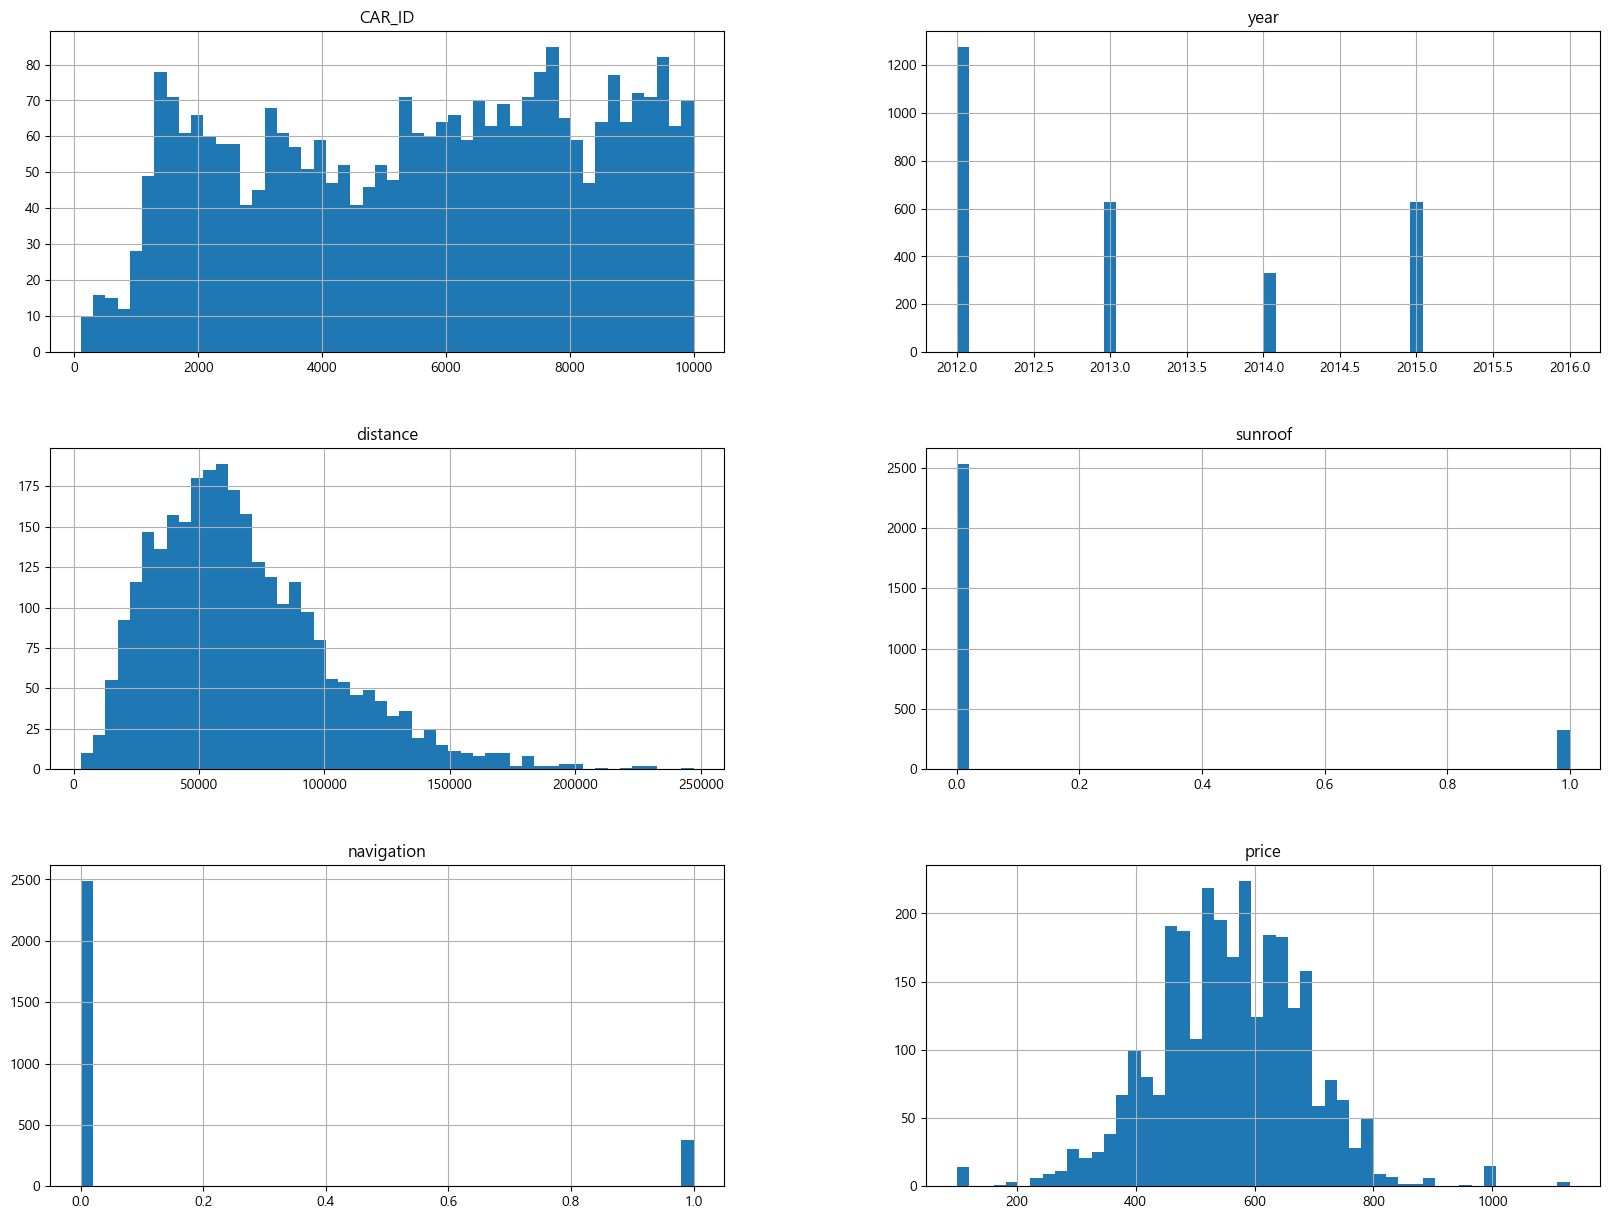

In [118]:
data.hist(bins=50, figsize=(20,15))

## (3) Preprocessing

### 1) 특성(x)과 레이블(y)로 나누기

In [180]:
# feature와 label 나누기
X= data[data.columns[1:-1]]
y= data[[data.columns[-1]]]

### 2) 훈련 데이터와 테스트 데이터 나누기

In [198]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.3, random_state=42)
print(X_train.shape, X_test.shape)

(2004, 7) (860, 7)


### 3) 연속형 변수와 범주형 변수를 나누어 처리한 후 다시 통합
- 훈련데이터 나누기

In [199]:
train_num= X_train[X_train.columns[0:4]]
train_num.head()

,year,distance,sunroof,navigation
1613,2012,122976,0,0
2771,2014,10634,0,0
1032,2012,36541,0,0
2805,2013,70197,1,1
2701,2012,72492,0,0


In [200]:
train_cat= X_train[X_train.columns[4:]]
train_cat.head()

,grade,fuel,transmission
1613,deluxe,gasoline,4-auto
2771,luxury,gasoline,4-auto
1032,special,gasoline,4-auto
2805,special,gasoline,4-auto
2701,luxury,gasoline,4-auto


- 원 핫 인코딩

In [201]:
train_cat= pd.get_dummies(train_cat)
train_cat.head()

,grade_advanced,grade_basic,grade_deluxe,grade_luxury,grade_smart,grade_smart_special,grade_special,grade_trendy,fuel_LPG,fuel_gasoline,fuel_hybrid,transmission_4-auto,transmission_5-manual,transmission_CVT
1613,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2771,0,0,0,1,0,0,0,0,0,1,0,1,0,0
1032,0,0,0,0,0,0,1,0,0,1,0,1,0,0
2805,0,0,0,0,0,0,1,0,0,1,0,1,0,0
2701,0,0,0,1,0,0,0,0,0,1,0,1,0,0


In [202]:
train_cat= train_cat.reset_index(drop=True)

In [203]:
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2004 entries, 0 to 2003
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   grade_advanced         2004 non-null   uint8
 1   grade_basic            2004 non-null   uint8
 2   grade_deluxe           2004 non-null   uint8
 3   grade_luxury           2004 non-null   uint8
 4   grade_smart            2004 non-null   uint8
 5   grade_smart_special    2004 non-null   uint8
 6   grade_special          2004 non-null   uint8
 7   grade_trendy           2004 non-null   uint8
 8   fuel_LPG               2004 non-null   uint8
 9   fuel_gasoline          2004 non-null   uint8
 10  fuel_hybrid            2004 non-null   uint8
 11  transmission_4-auto    2004 non-null   uint8
 12  transmission_5-manual  2004 non-null   uint8
 13  transmission_CVT       2004 non-null   uint8
dtypes: uint8(14)
memory usage: 27.5 KB


- 테스트 데이터 나누기, 원 핫 인코딩

In [204]:
test_num= X_test[X_test.columns[0:4]]
test_cat= X_test[X_test.columns[4:]]
test_cat= pd.get_dummies(test_cat)
test_cat.head()

,grade_advanced,grade_basic,grade_deluxe,grade_luxury,grade_smart,grade_smart_special,grade_special,grade_trendy,fuel_LPG,fuel_gasoline,fuel_hybrid,transmission_4-auto,transmission_5-manual,transmission_CVT
1590,0,0,0,0,1,0,0,0,0,1,0,0,1,0
1752,0,0,0,1,0,0,0,0,0,1,0,1,0,0
772,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1735,0,0,0,1,0,0,0,0,0,1,0,1,0,0
387,0,0,0,0,0,0,1,0,0,1,0,1,0,0


In [205]:
test_cat=test_cat.reset_index(drop=True)

In [206]:
test_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   grade_advanced         860 non-null    uint8
 1   grade_basic            860 non-null    uint8
 2   grade_deluxe           860 non-null    uint8
 3   grade_luxury           860 non-null    uint8
 4   grade_smart            860 non-null    uint8
 5   grade_smart_special    860 non-null    uint8
 6   grade_special          860 non-null    uint8
 7   grade_trendy           860 non-null    uint8
 8   fuel_LPG               860 non-null    uint8
 9   fuel_gasoline          860 non-null    uint8
 10  fuel_hybrid            860 non-null    uint8
 11  transmission_4-auto    860 non-null    uint8
 12  transmission_5-manual  860 non-null    uint8
 13  transmission_CVT       860 non-null    uint8
dtypes: uint8(14)
memory usage: 11.9 KB


- 변수의 갯수가 다를 경우: align()

In [207]:
train_cat1, test_cat1= train_cat.align(test_cat, join='outer', axis=1)

In [208]:
train_cat1.info()
test_cat1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2004 entries, 0 to 2003
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   grade_advanced         2004 non-null   uint8
 1   grade_basic            2004 non-null   uint8
 2   grade_deluxe           2004 non-null   uint8
 3   grade_luxury           2004 non-null   uint8
 4   grade_smart            2004 non-null   uint8
 5   grade_smart_special    2004 non-null   uint8
 6   grade_special          2004 non-null   uint8
 7   grade_trendy           2004 non-null   uint8
 8   fuel_LPG               2004 non-null   uint8
 9   fuel_gasoline          2004 non-null   uint8
 10  fuel_hybrid            2004 non-null   uint8
 11  transmission_4-auto    2004 non-null   uint8
 12  transmission_5-manual  2004 non-null   uint8
 13  transmission_CVT       2004 non-null   uint8
dtypes: uint8(14)
memory usage: 27.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860

- 정규화

In [209]:
minmax= MinMaxScaler()
minmax.fit(train_num)

train_scaled= minmax.transform(train_num)
test_scaled= minmax.transform(test_num)

- 통합

In [210]:
train_final= pd.concat([pd.DataFrame(train_scaled), train_cat], axis=1, ignore_index=True)
train_final

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.000000,0.491642,0.0,0.0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,0.666667,0.031609,0.0,0.0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
2,0.000000,0.137696,0.0,0.0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
3,0.333333,0.275516,1.0,1.0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
4,0.000000,0.284913,0.0,0.0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999,0.333333,0.154224,0.0,1.0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
2000,0.000000,0.481352,0.0,0.0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2001,0.000000,0.418032,1.0,0.0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
2002,0.333333,0.496777,0.0,0.0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


In [211]:
test_final= pd.concat([pd.DataFrame(test_scaled), test_cat], axis=1, ignore_index=True)
test_final

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.000000,0.356608,0.0,0.0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
1,0.333333,0.153007,1.0,0.0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
2,0.000000,0.264091,0.0,0.0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
3,1.000000,0.074581,0.0,0.0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
4,0.333333,0.270684,0.0,0.0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,1.000000,0.103049,0.0,0.0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
856,1.000000,0.474837,0.0,0.0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
857,0.333333,0.248944,1.0,1.0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
858,1.000000,0.280454,1.0,1.0,0,0,0,1,0,0,0,0,0,1,0,1,0,0


### (4) 선형 회귀 학습

In [212]:
model= LinearRegression()
model.fit(train_final, y_train)

LinearRegression()

In [213]:
model.score(train_final, y_train)

0.6160252283256753

In [214]:
model.score(test_final, y_test)

0.6350232660851427

In [216]:
#### 오차를 이용한 성능 평가
pred= model.predict(test_final)
mse= mean_squared_error(y_test, pred)
np.sqrt(mse)

76.38394955892208